In [2]:
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [3]:
import pyroll.core as pr
import pyroll.pillar_model
import pyroll.neutral_point_estimator
import pyroll.sparling_spreading
import pyroll.hensel_force_torque
#import pyroll.freiberg_flow_stress
import pyroll.ring_model_thermal

In [4]:
from in_profile import create_in_profile_from_surface_temperature
from rolling_sequence import roughing_sequence

In [5]:
pyroll.core.Config.DEFAULT_ITERATION_PRECISION = 1e-3
pyroll.pillar_model.Config.PILLAR_COUNT = 30
pyroll.neutral_point_estimator.Config.ESTIMATOR = "EQUAL"
ROLL_SURFACE_TEMPERATURE = 50 + 273.15
DISK_ELEMENT_COUNT = 30

In [6]:
in_profile = create_in_profile_from_surface_temperature(1100 + 273.15)
in_profile.ring_temperatures = in_profile.ring_temperatures

In [7]:
r_sequence = roughing_sequence(
    roll_surface_temperature=ROLL_SURFACE_TEMPERATURE,
    disk_element_count=DISK_ELEMENT_COUNT
)

In [8]:
r_sequence.solve(in_profile)

Solution iteration of TwoRollPass 'A' exceeded the maximum iteration count of 100. Continuing anyway.
Solution iteration of TwoRollPass 'A' exceeded the maximum iteration count of 100. Continuing anyway.
Solution iteration of TwoRollPass 'A' exceeded the maximum iteration count of 100. Continuing anyway.


Profile(
    classifiers={'box', 'generic_elongation', 'symmetric'},
    core_temperature=np.float64(1382.5356032508612),
    cross_section=Polygon(
        area=0.019187876405044758,
        height=0.11599999999999998,
        perimeter=0.5335854341982864,
        width=0.17060634061504854,
        ),
    flow_stress=100000000.0,
    length=0.0,
    material=['BST500', 'steel'],
    ring_temperatures=array([1382.53560325, 1382.53560325, 1382.53560325, 1382.53560325,
           1382.53560325, 1382.53560324, 1382.53560235, 1382.53550592,
           1382.52681128, 1381.91208483, 1351.51799209]),
    strain=np.float64(0.3639435822688036),
    surface_temperature=np.float64(1351.5179920871685),
    t=np.float64(0.3385681170259024),
    temperature=np.float64(1376.8052608532932),
    width=np.float64(0.17060634061504854),
    )

In [9]:
for roll_pass in r_sequence.roll_passes:
    history = roll_pass.convergence_history
    iterations = [entry["iteration"] for entry in history]
    residua = [entry["residuum"] for entry in history]

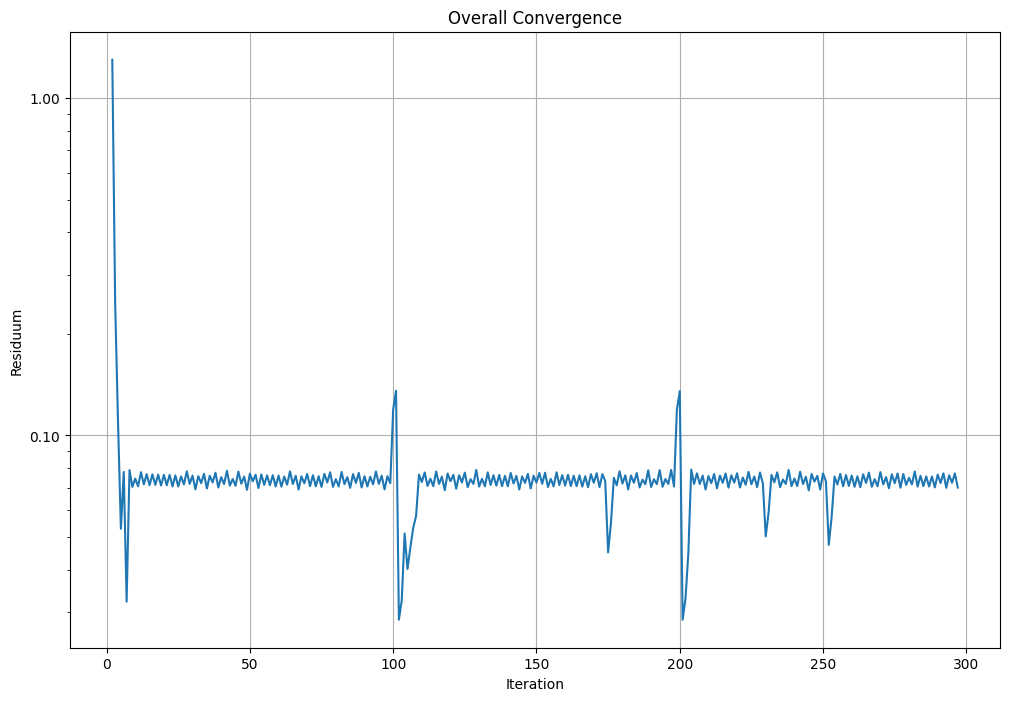

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.semilogy(iterations, residua, label=roll_pass.label)
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.set_xlabel("Iteration")
ax.set_ylabel("Residuum")
ax.set_title("Overall Convergence")
ax.grid()

/tmp/ipykernel_92652/2678773297.py:6: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



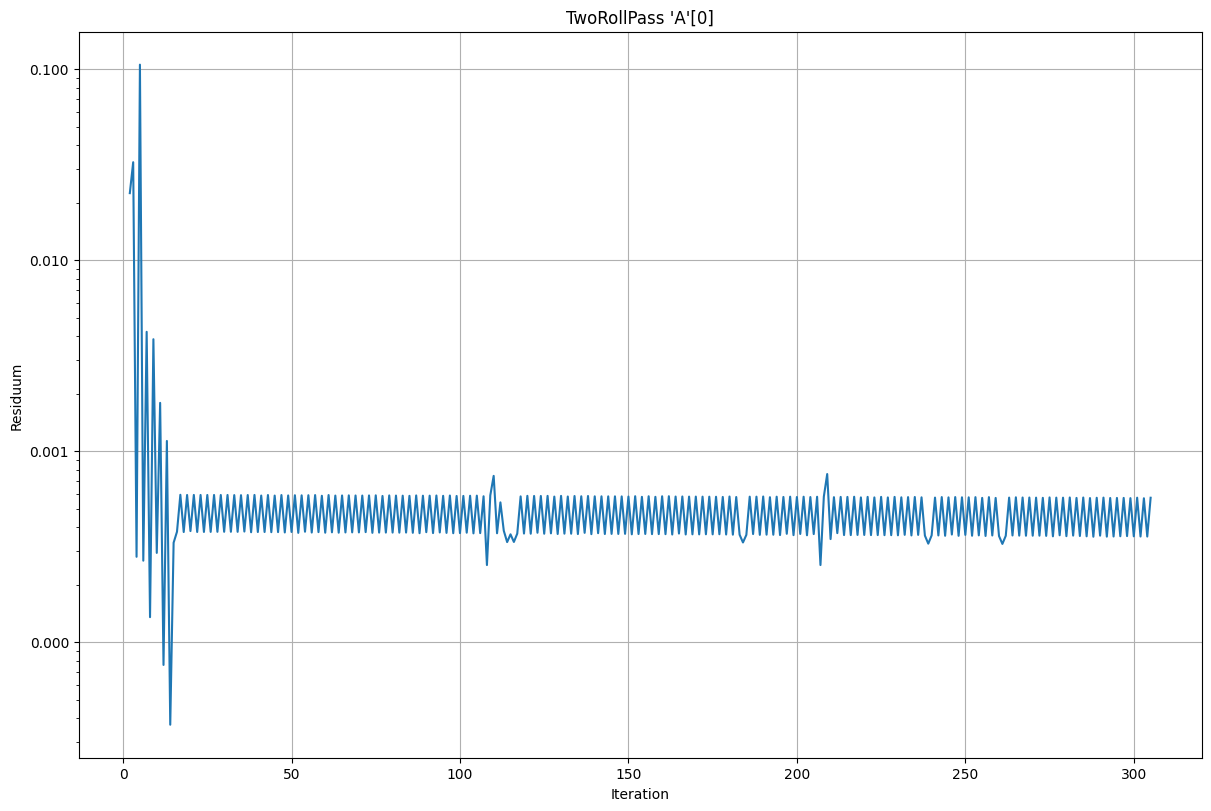

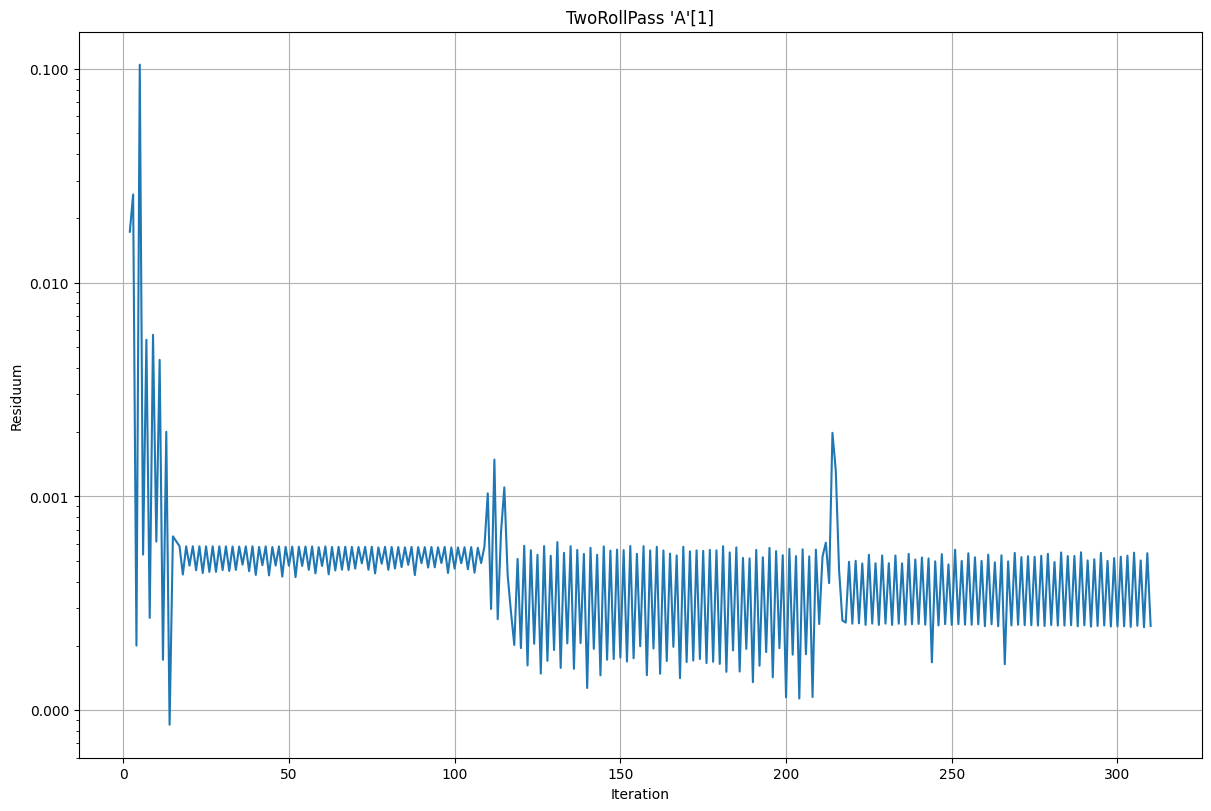

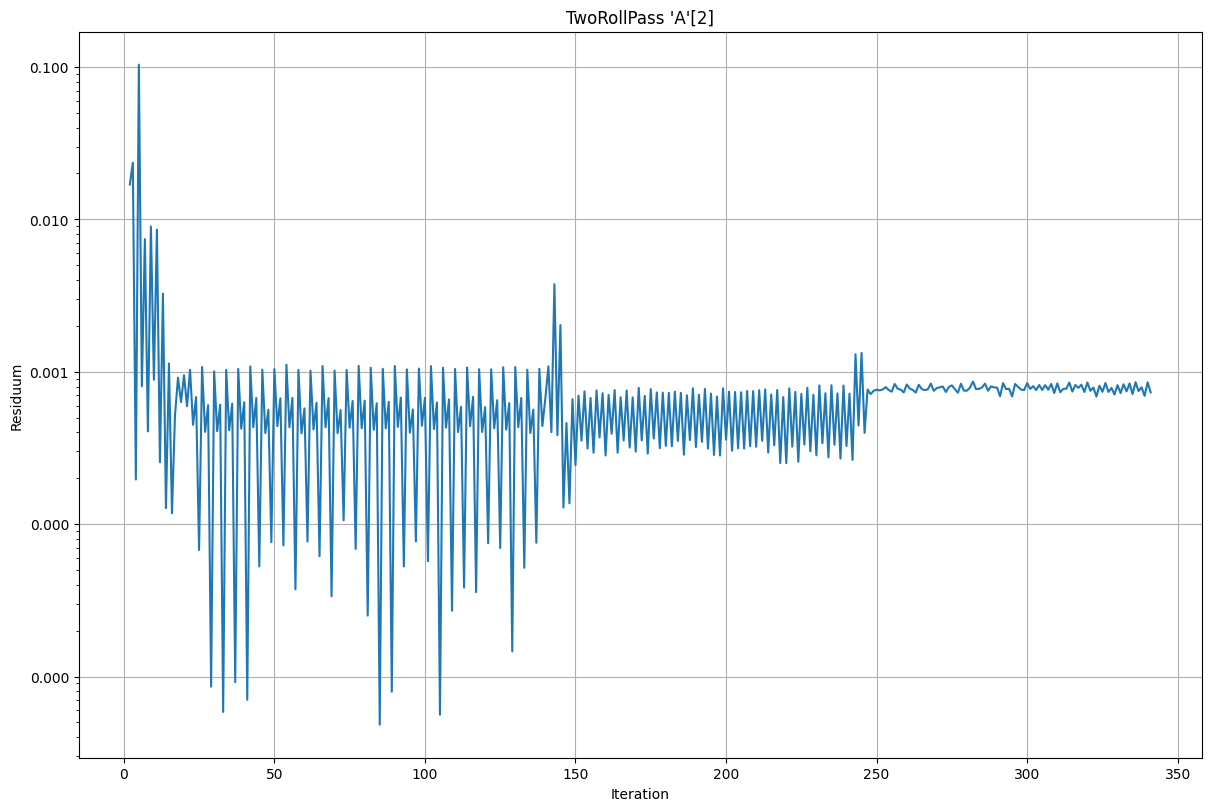

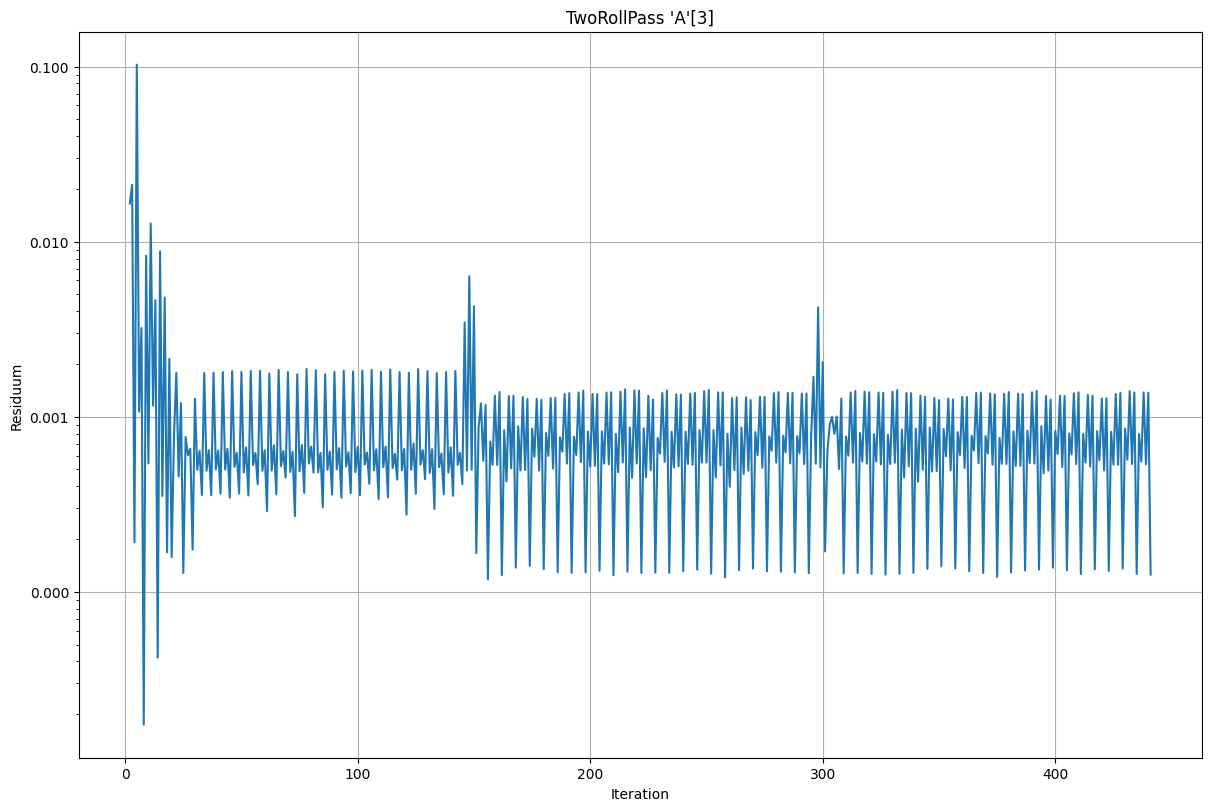

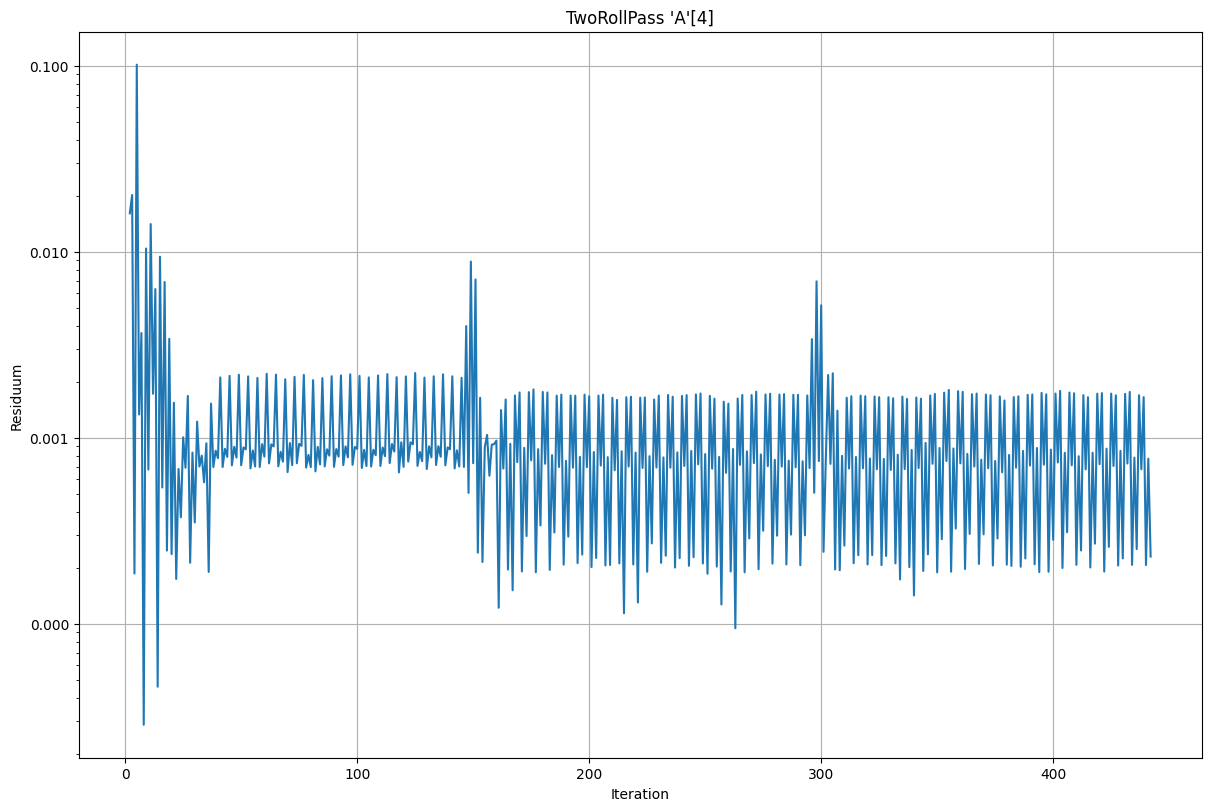

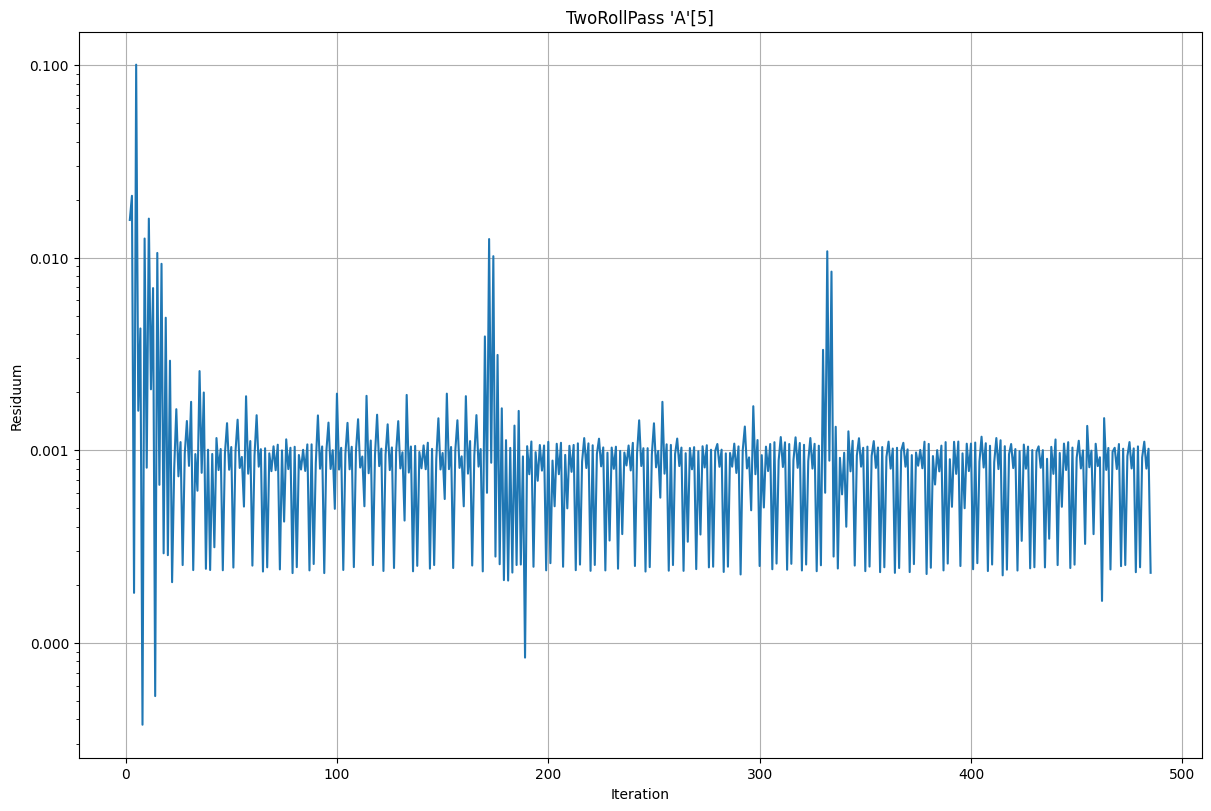

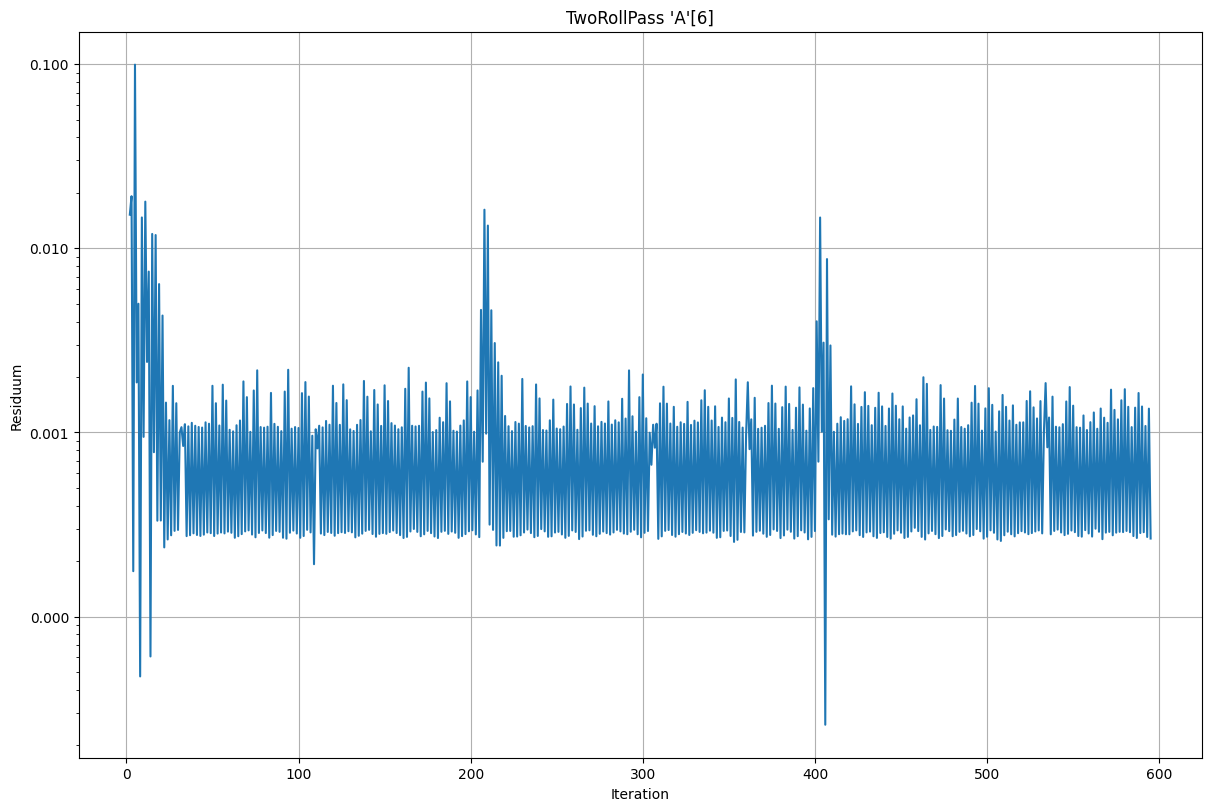

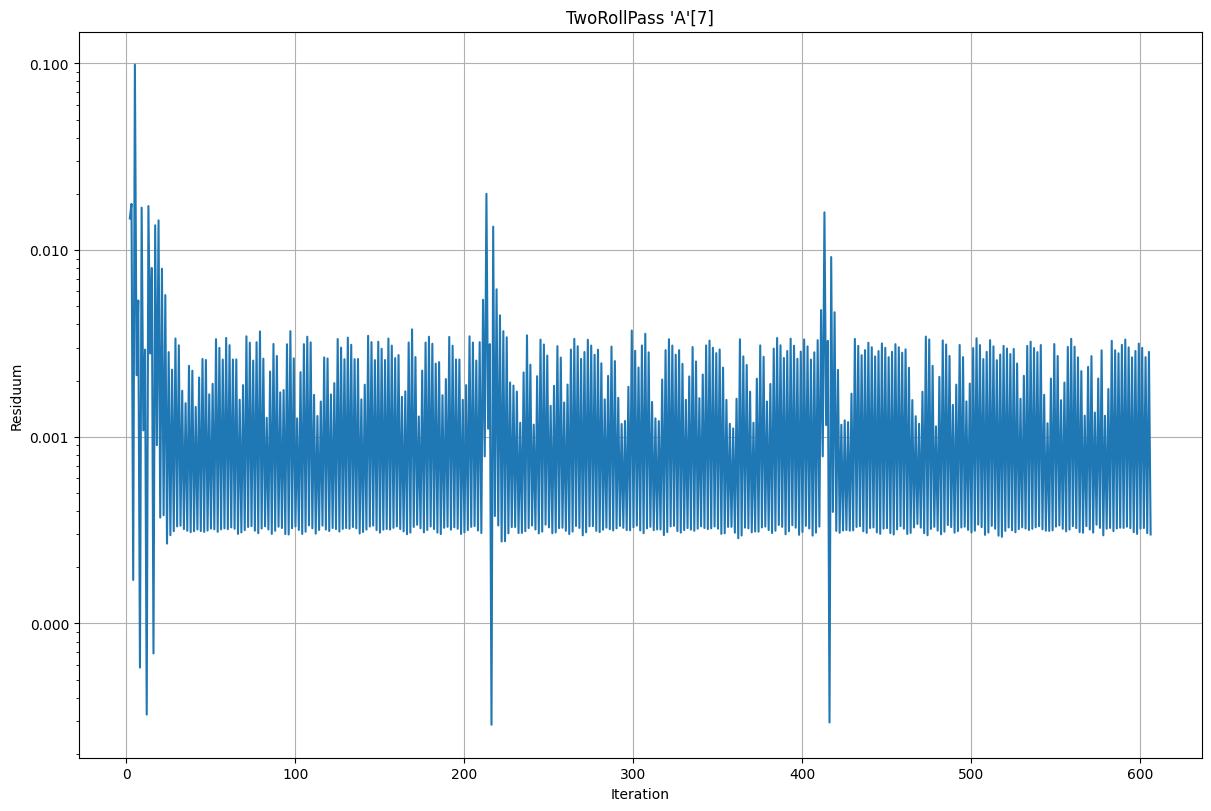

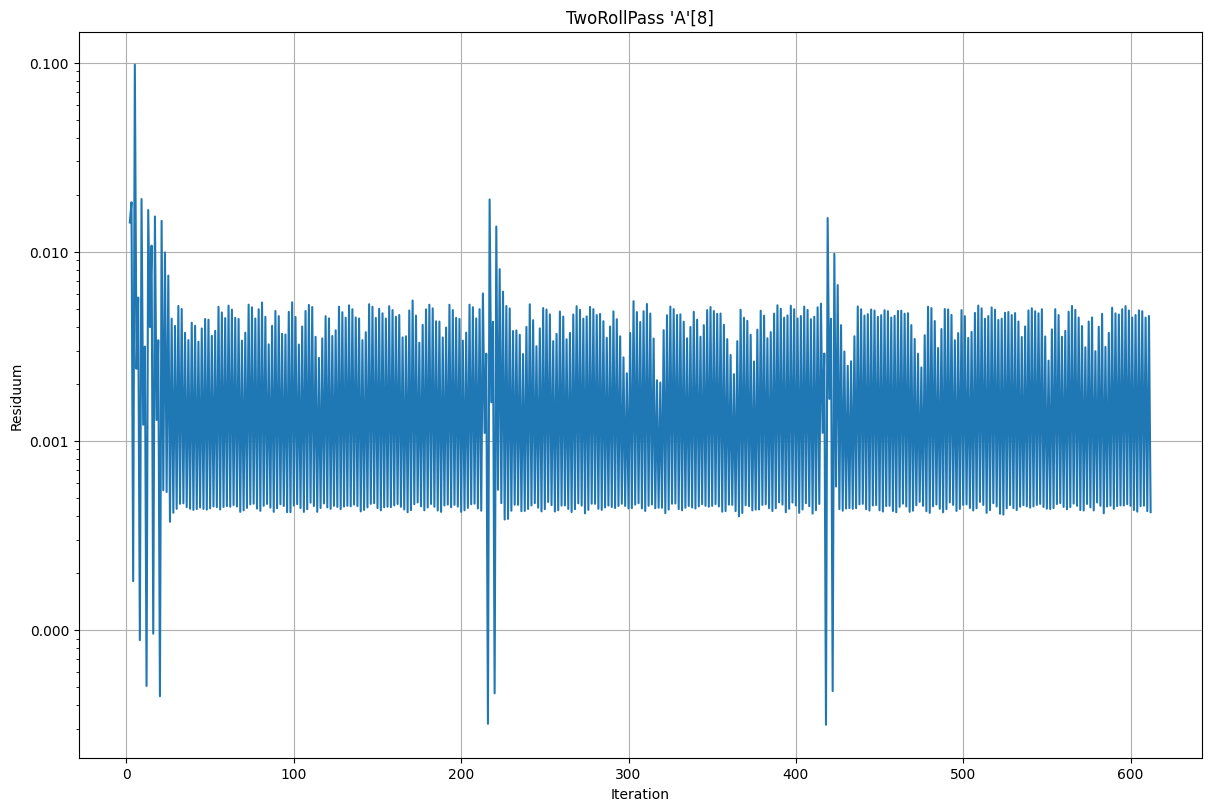

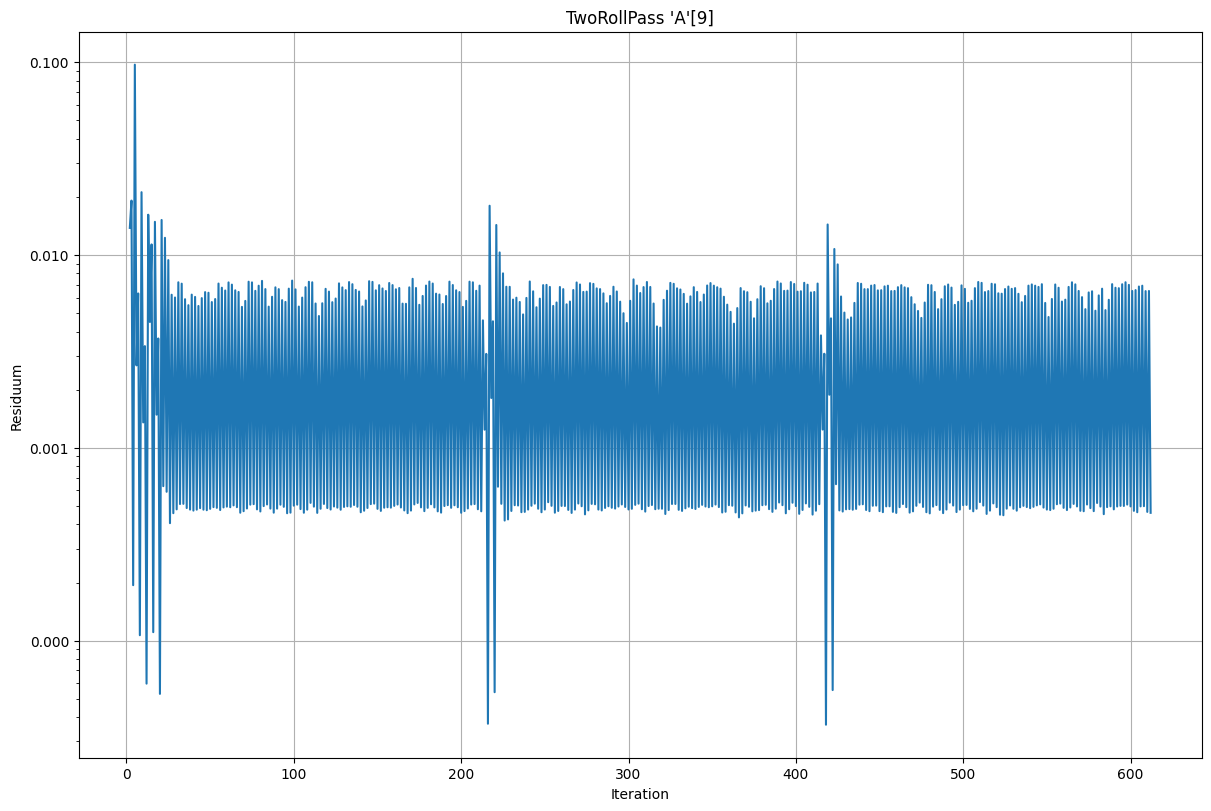

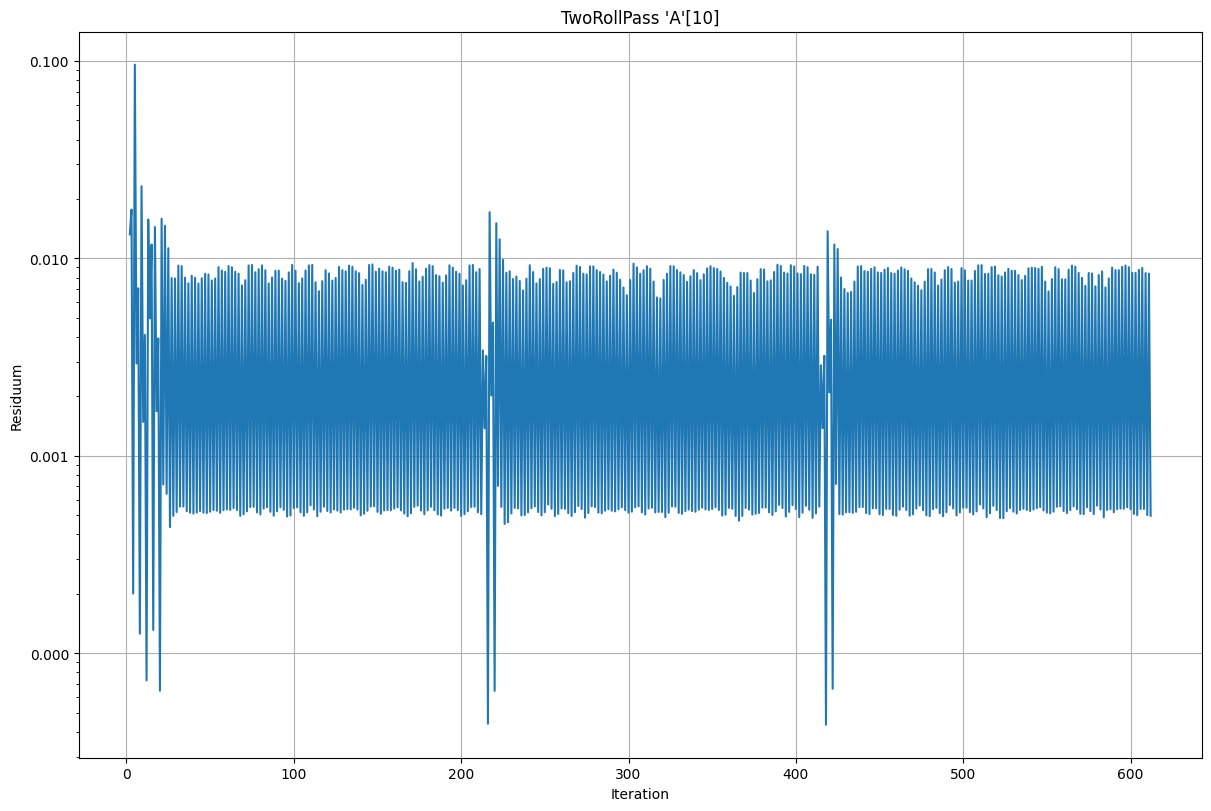

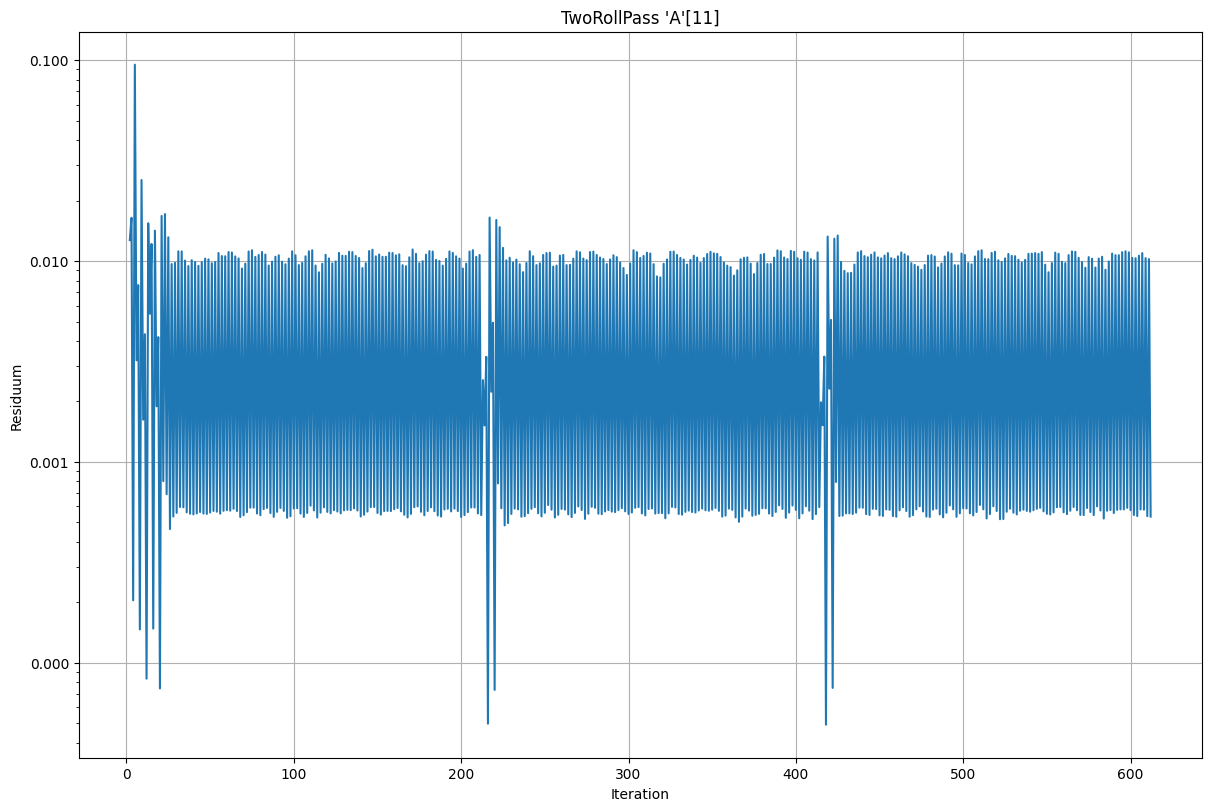

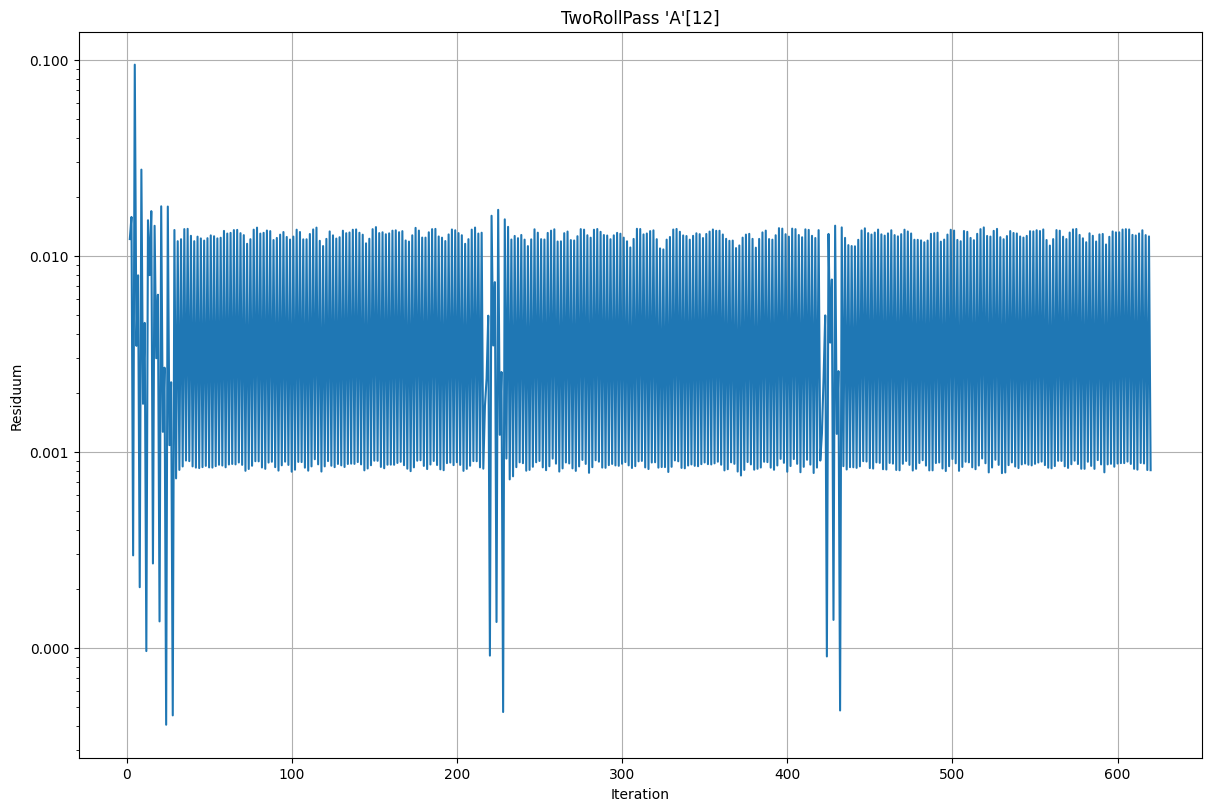

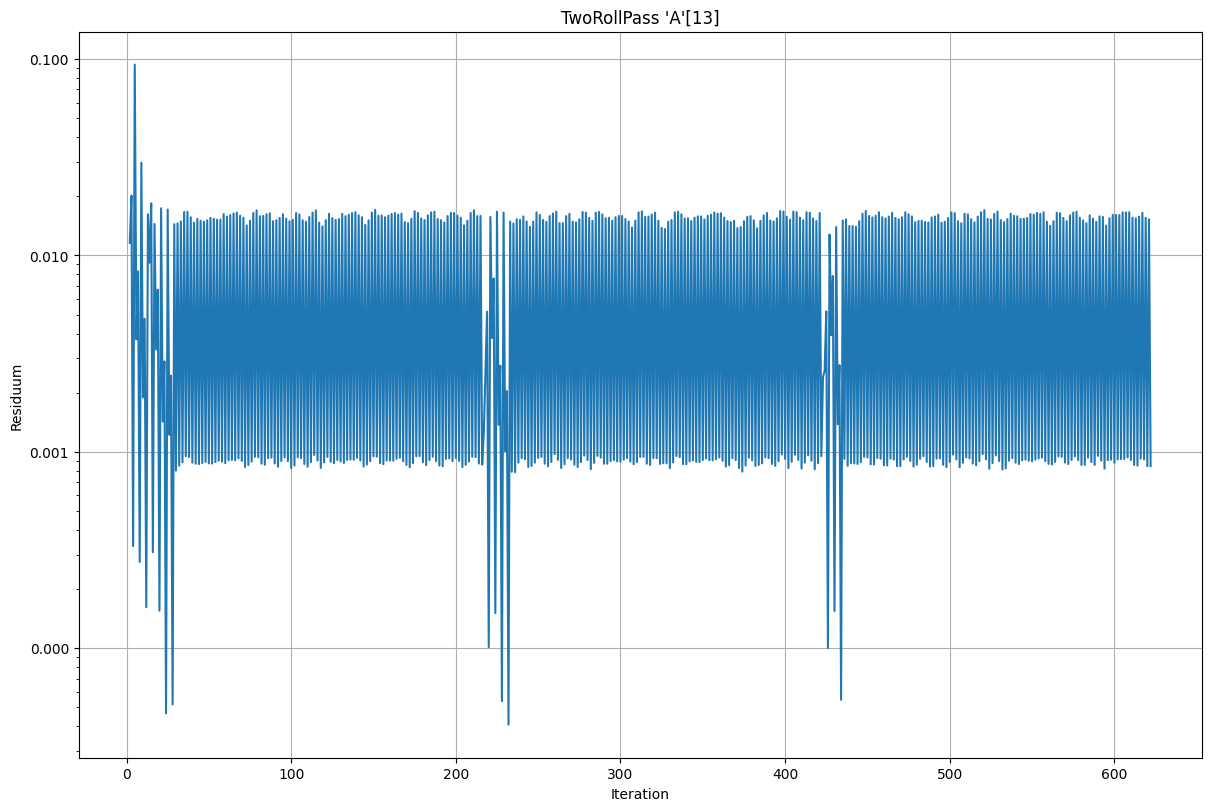

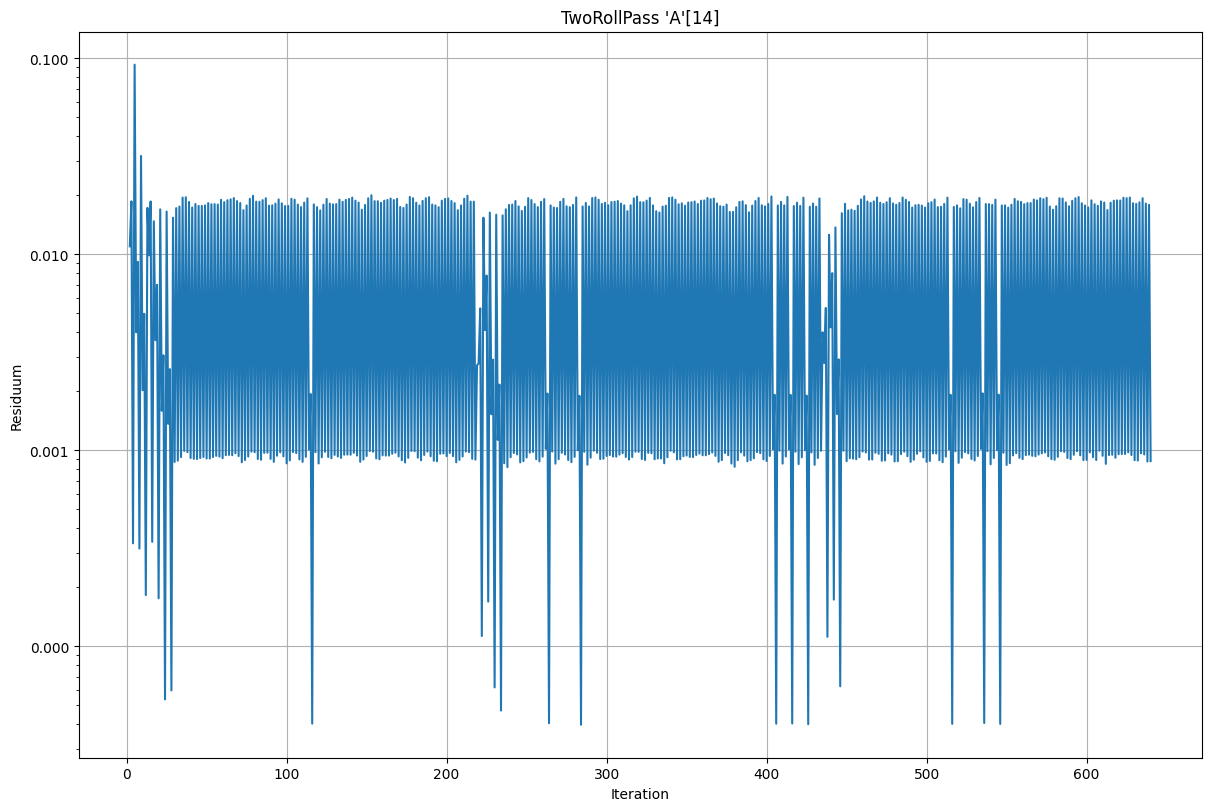

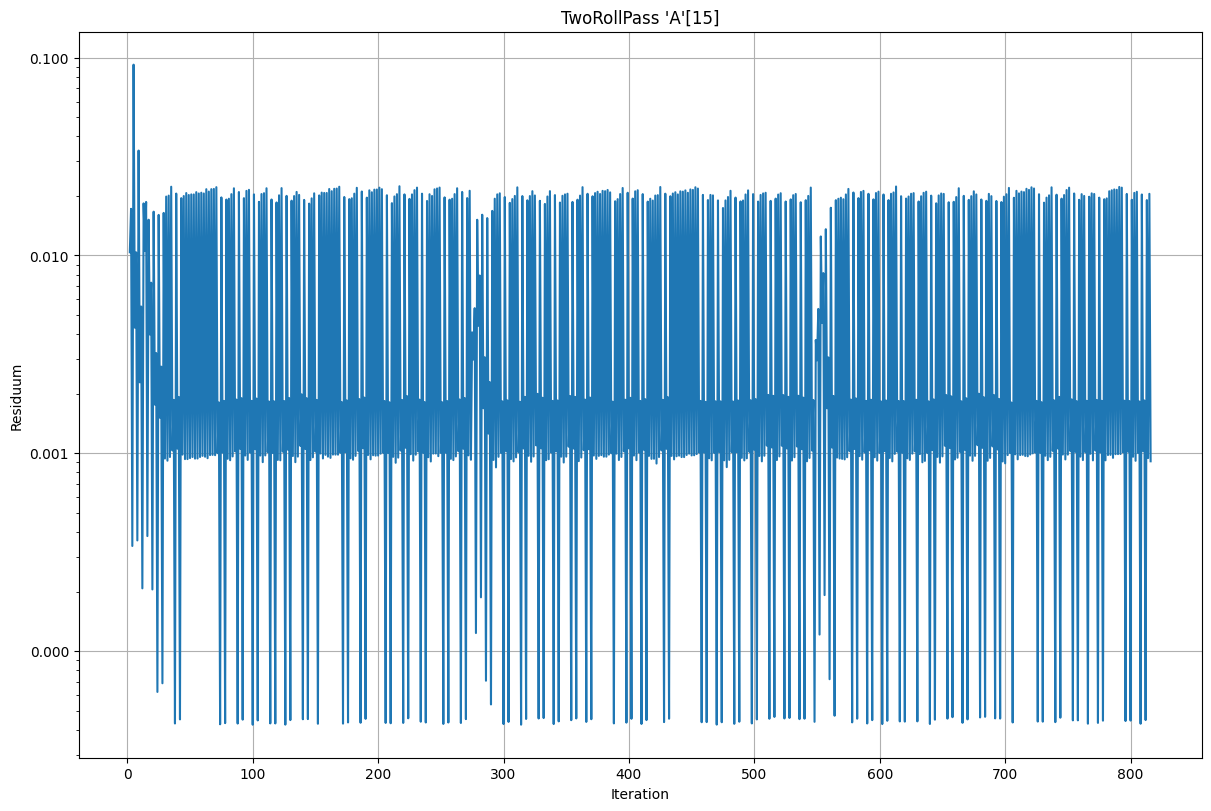

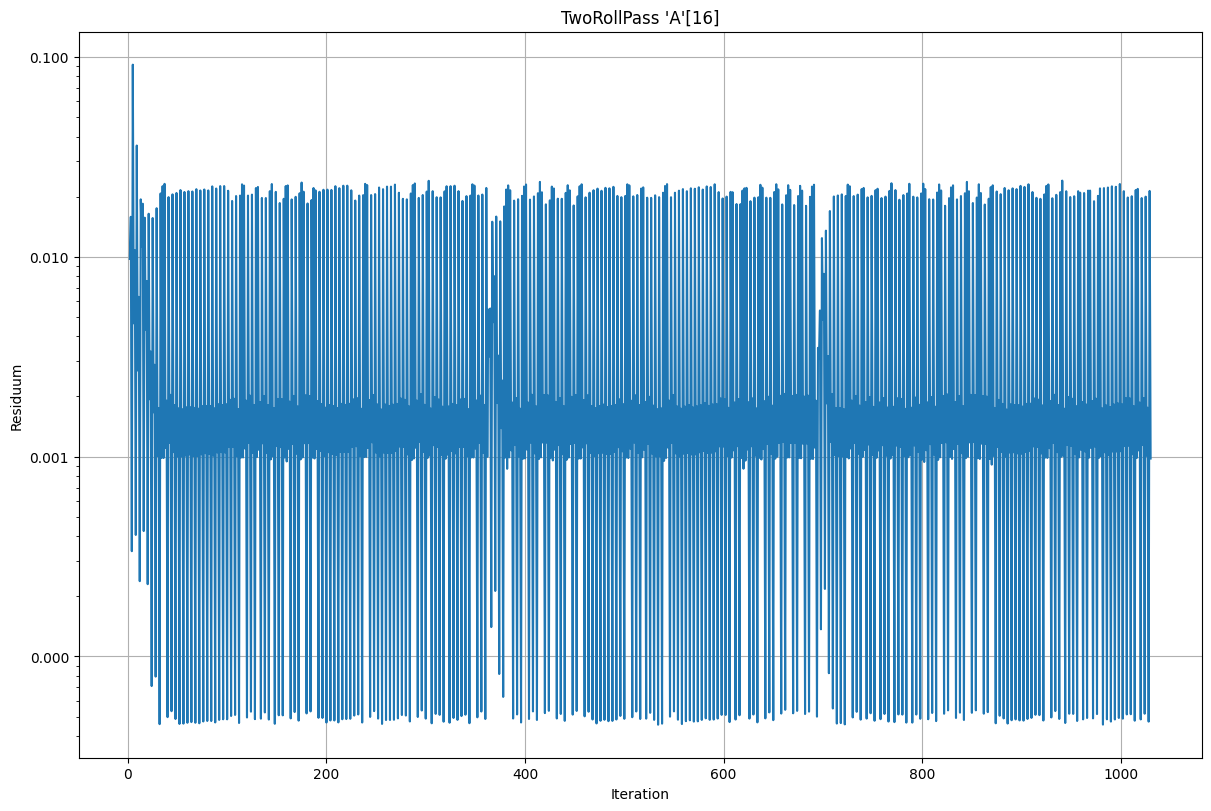

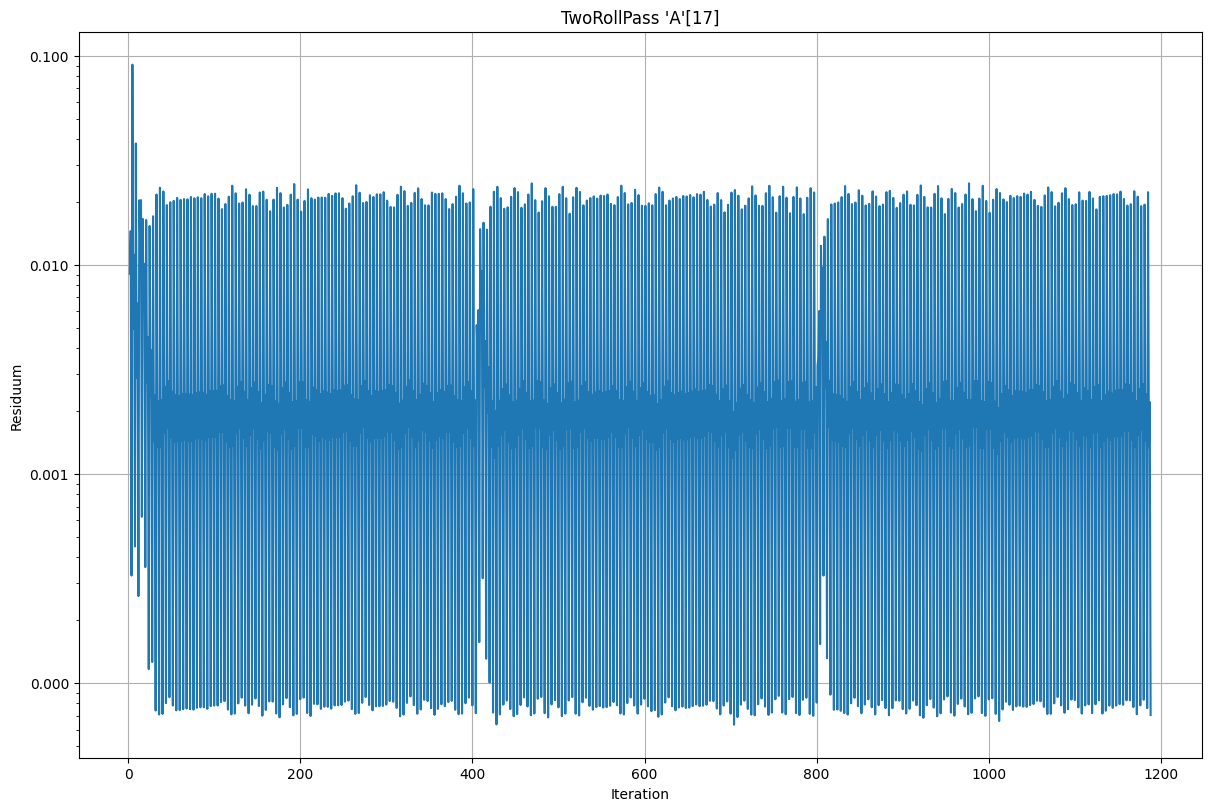

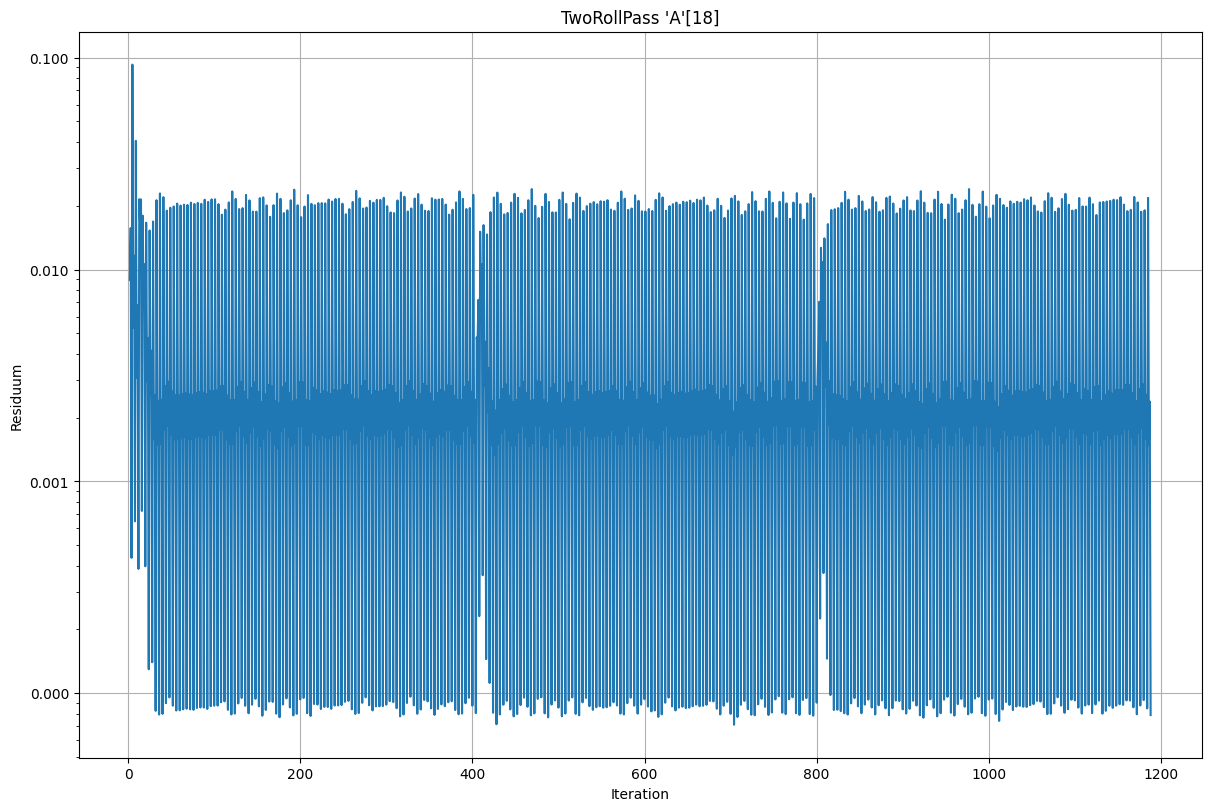

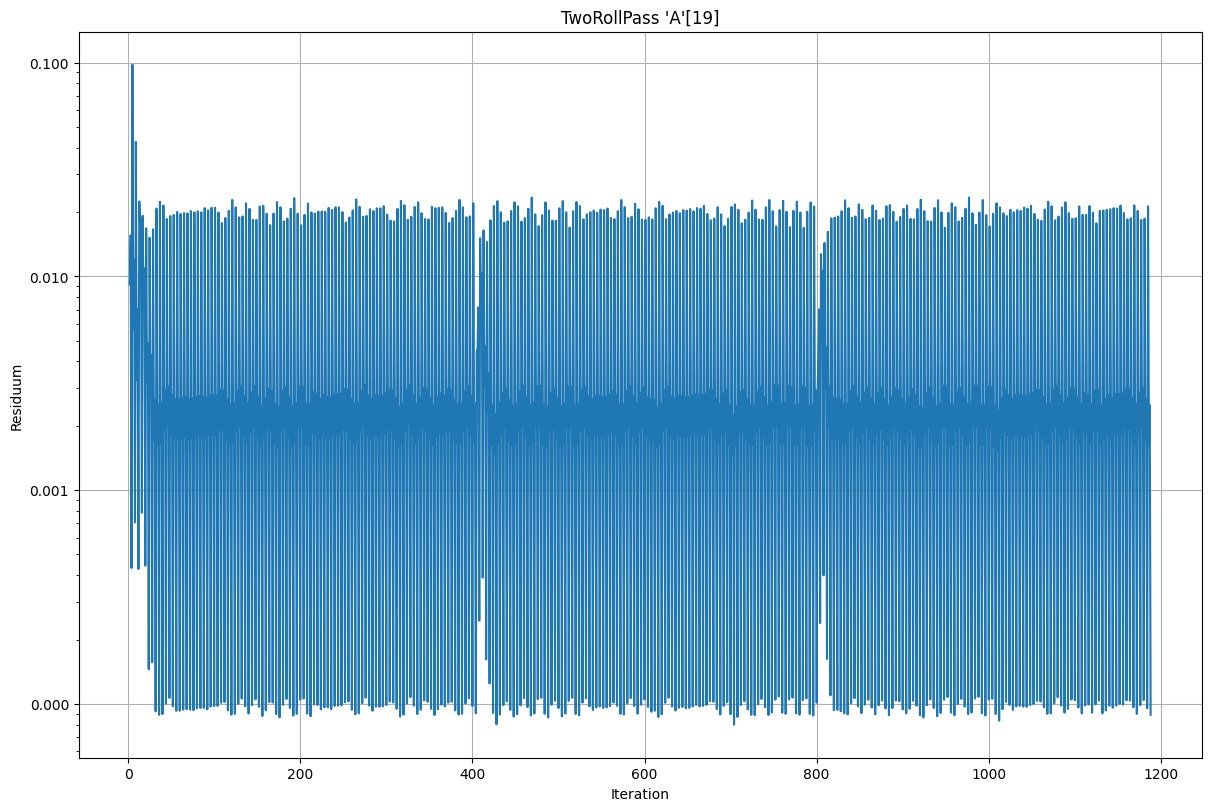

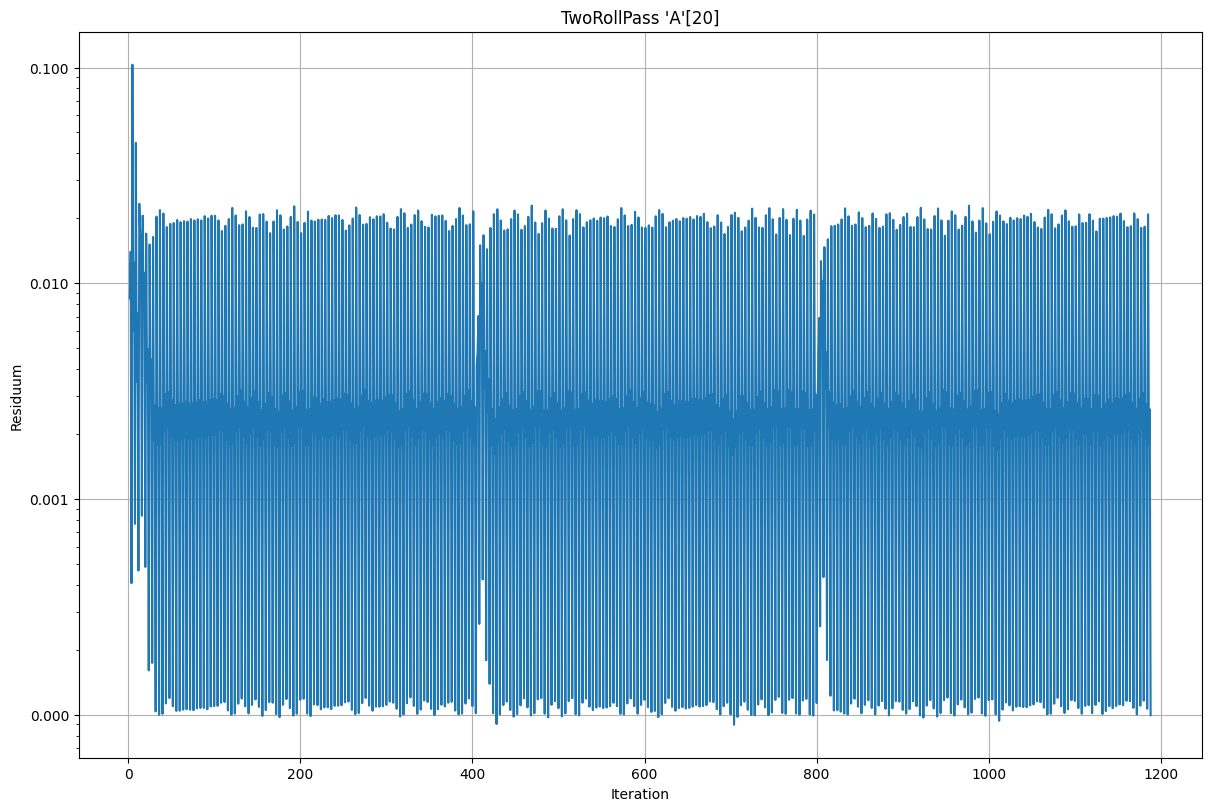

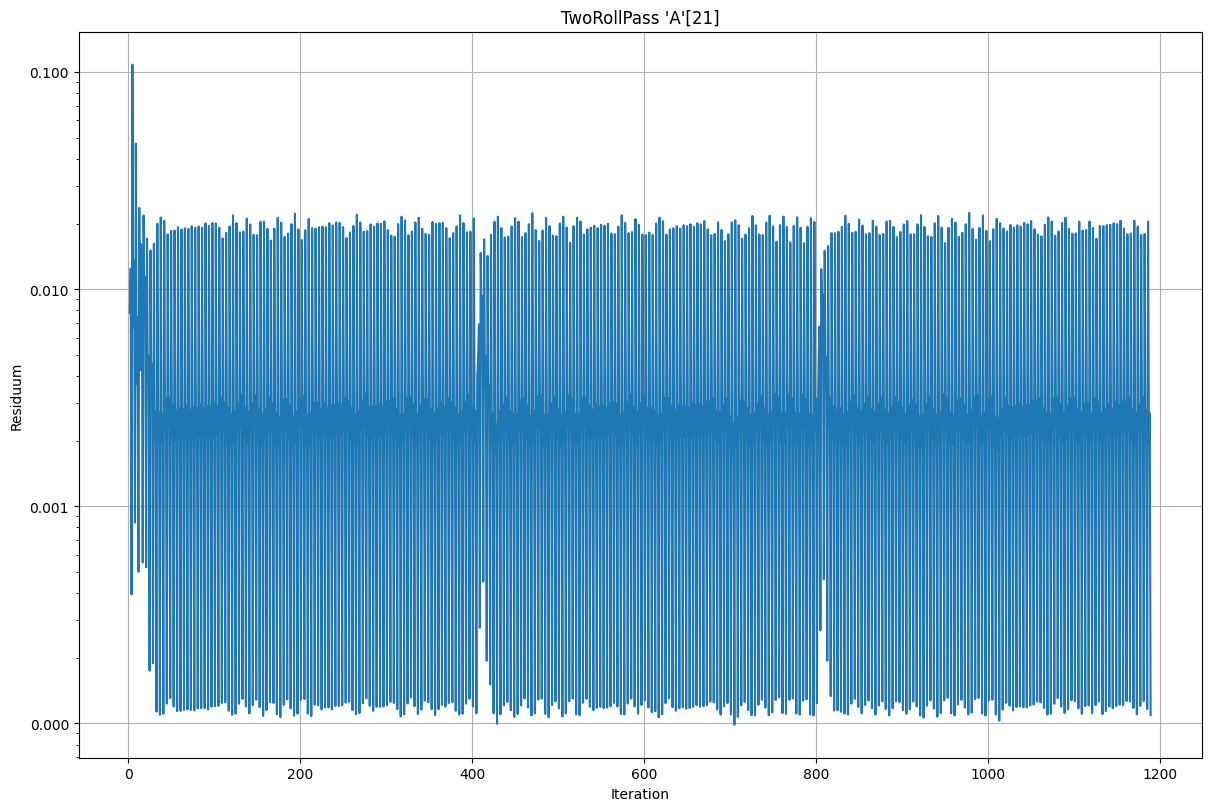

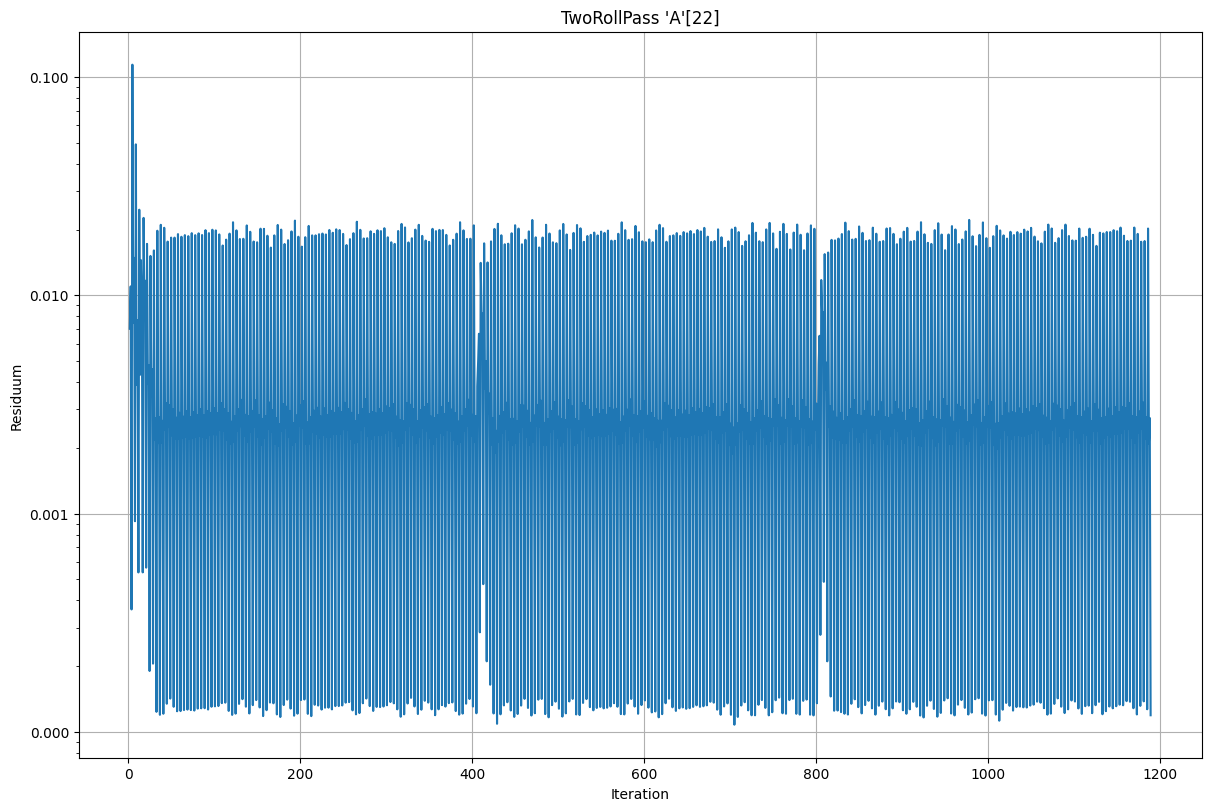

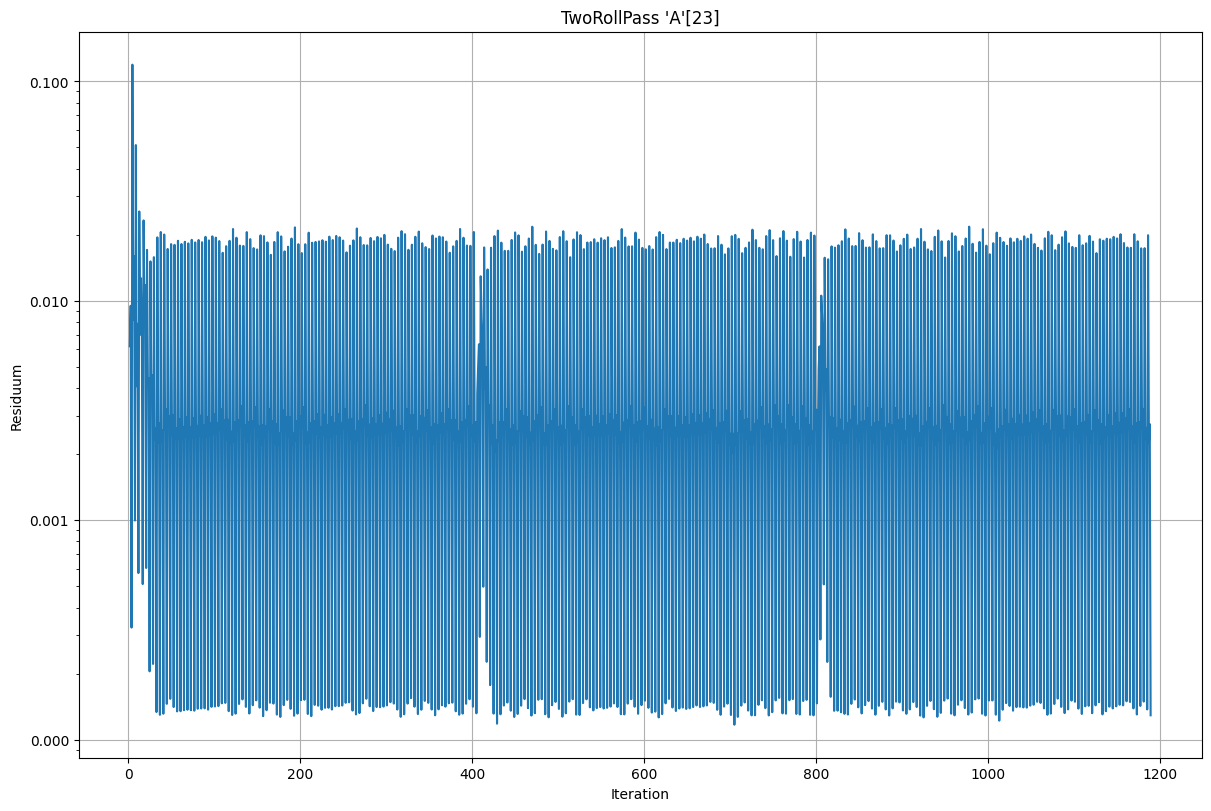

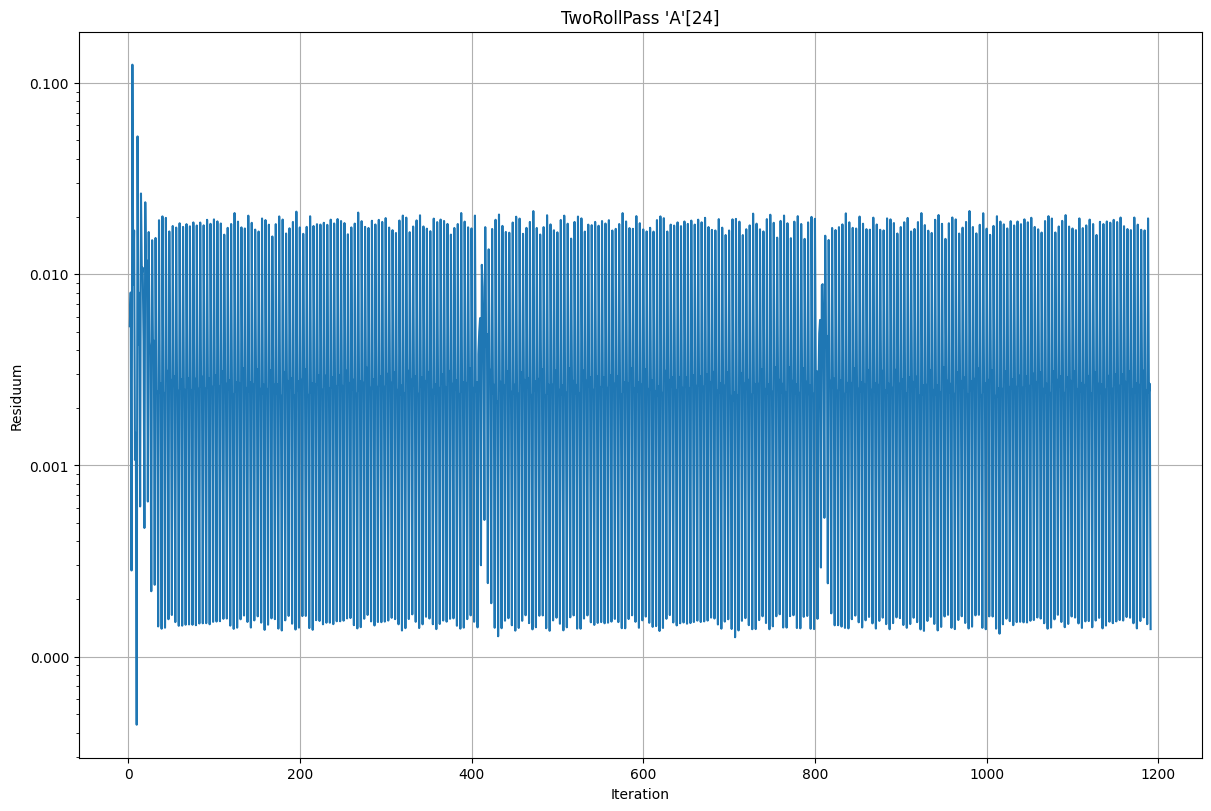

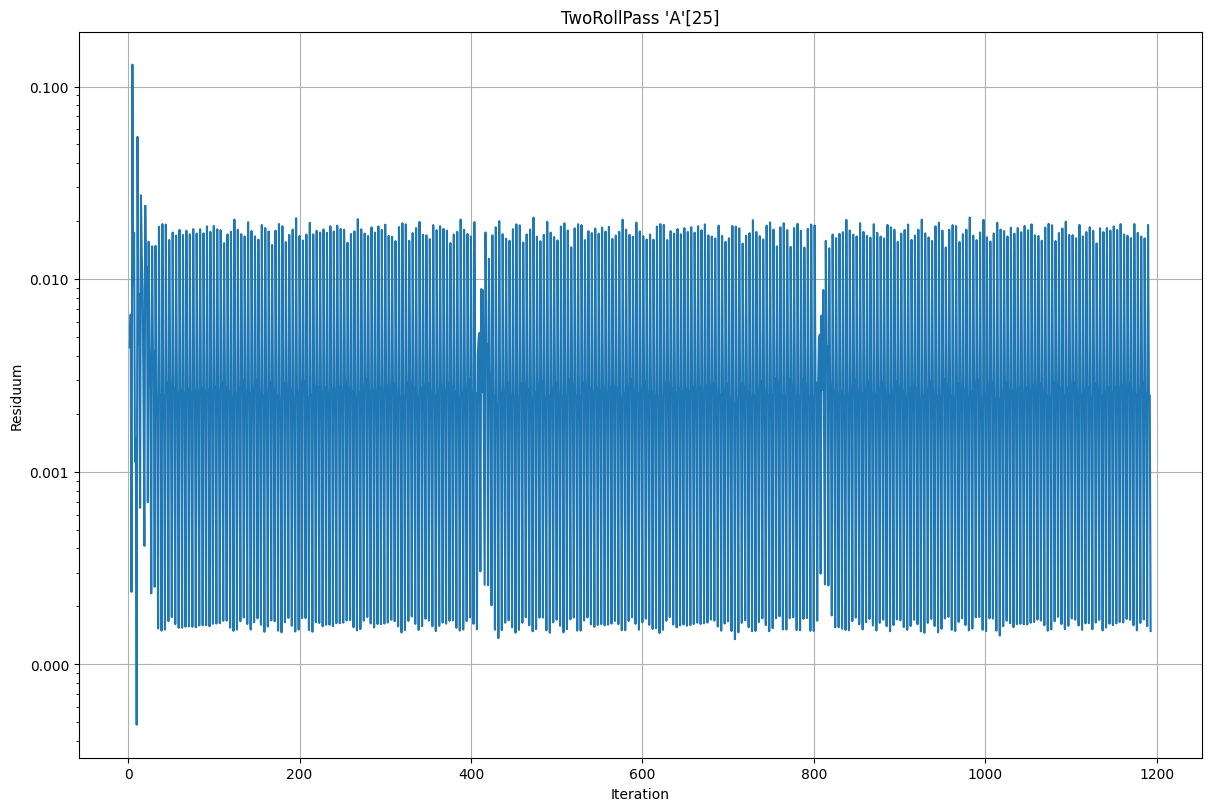

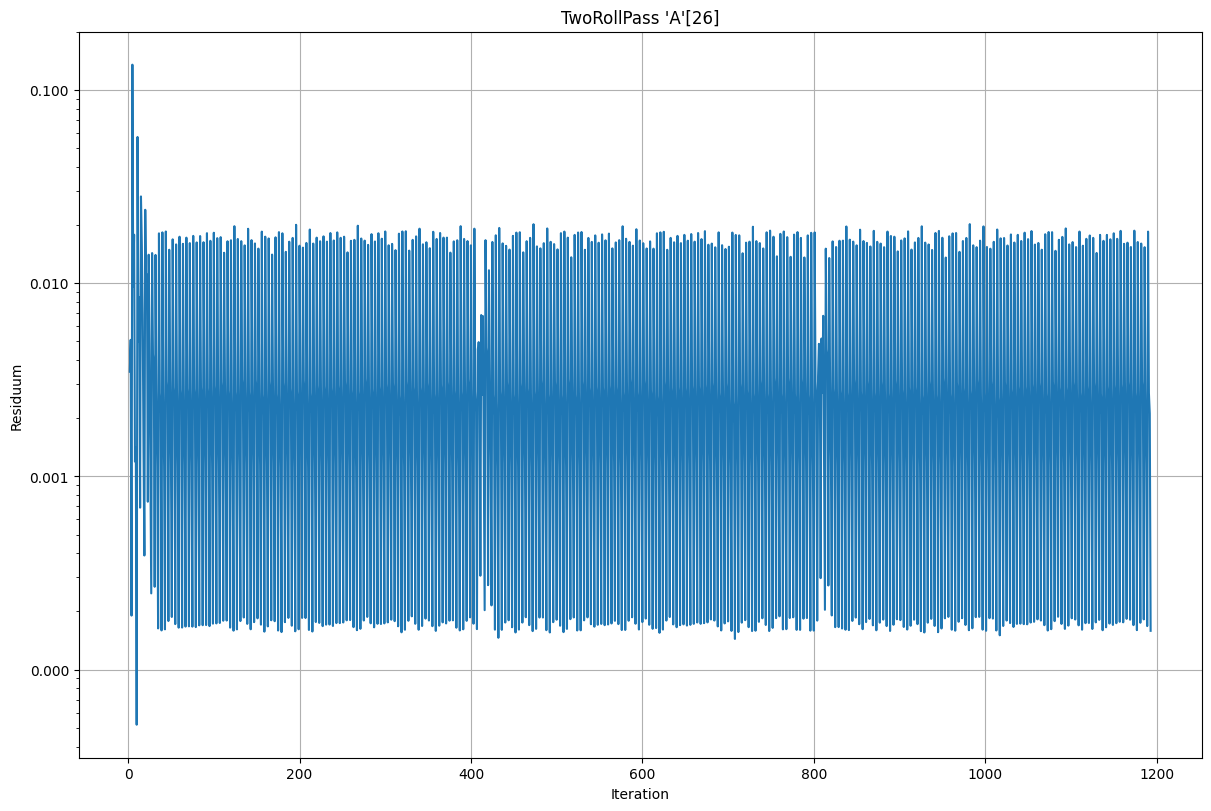

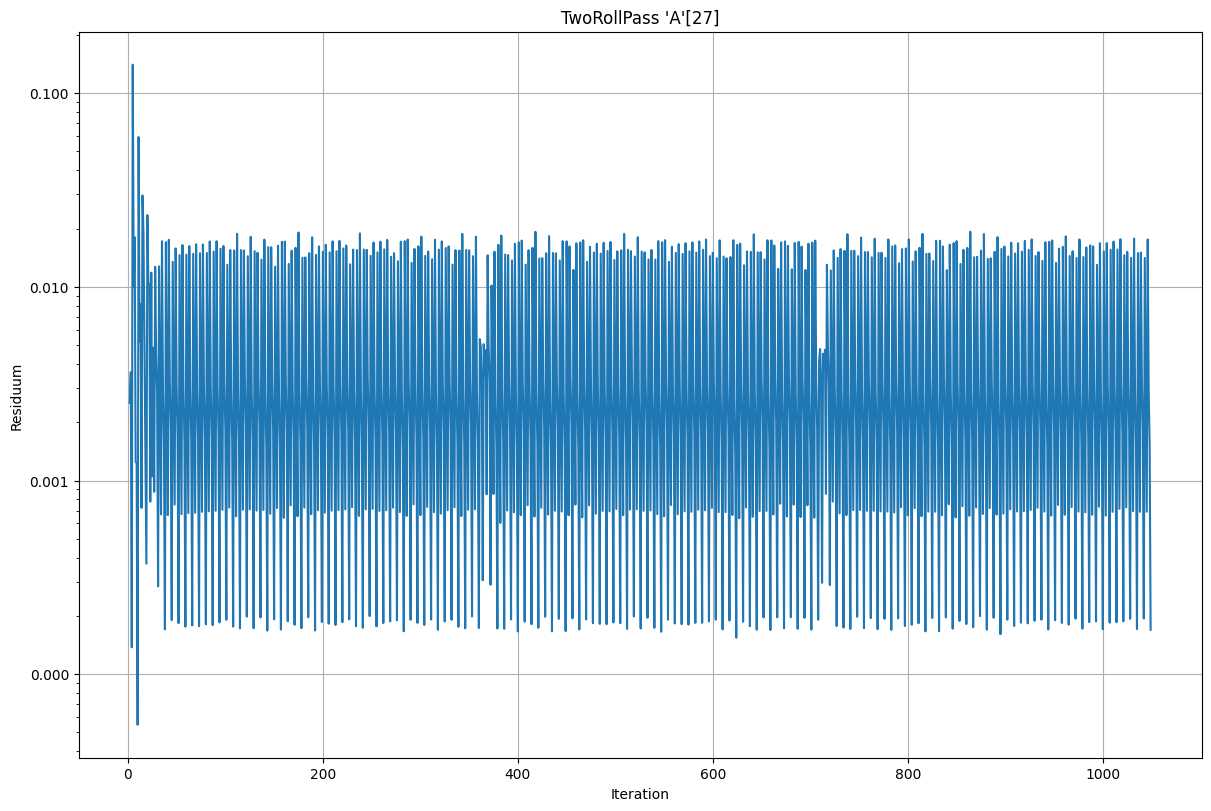

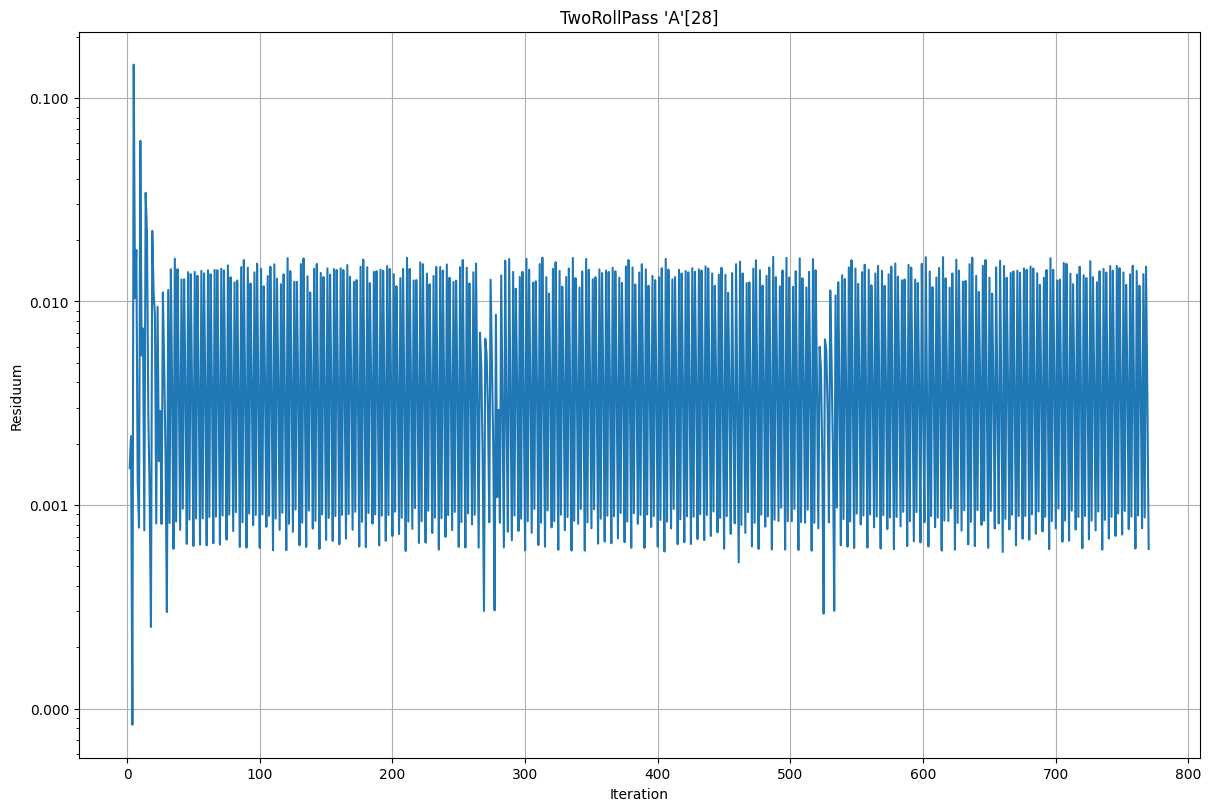

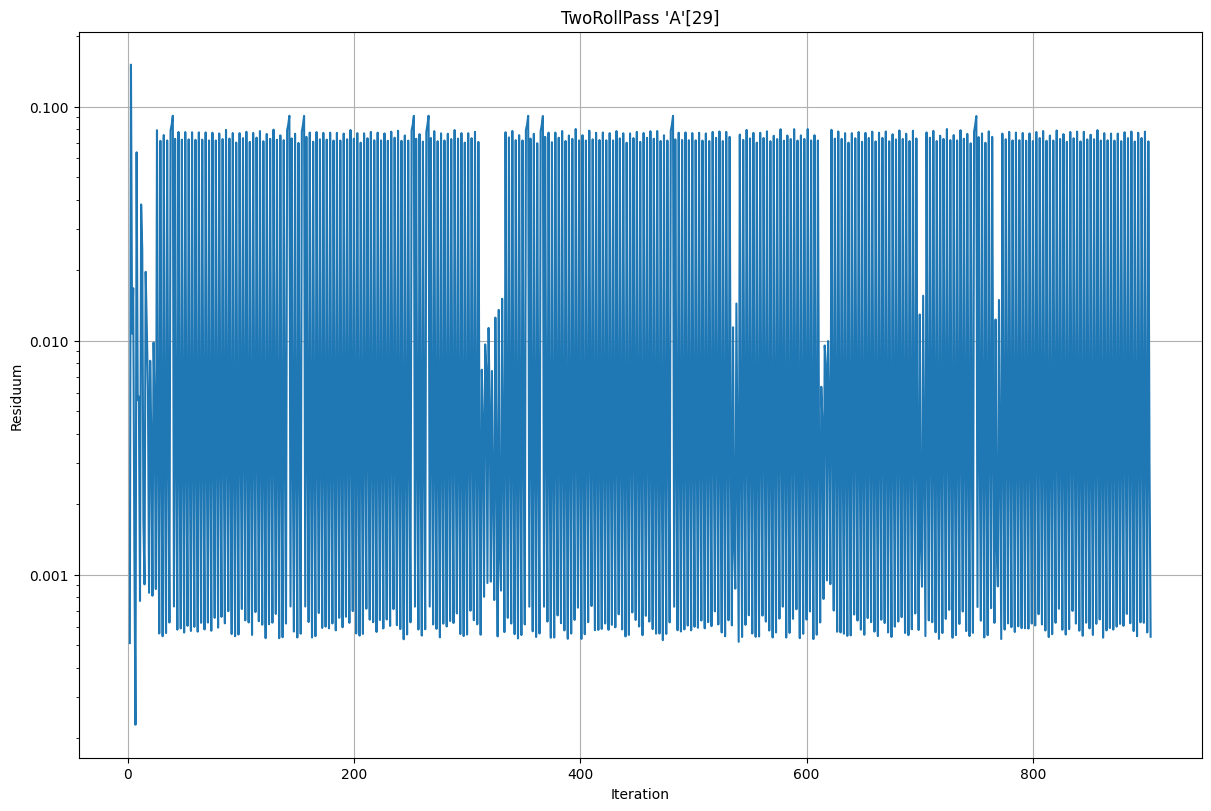

In [11]:
for roll_pass in r_sequence.roll_passes:
    for de in roll_pass.disk_elements:
        history = de.convergence_history
        iterations = [entry["iteration"] for entry in history]
        residua = [entry["residuum"] for entry in history]
        fig: plt.Figure = plt.figure(constrained_layout=True, figsize=(12, 8))
        ax = fig.subplots()
        ax.semilogy(iterations, residua, label=de.label)
        ax.yaxis.set_major_formatter(ScalarFormatter())
        ax.set_xlabel("Iteration")
        ax.set_ylabel("Residuum")
        ax.set_title(de.label)
        ax.grid()

15036029

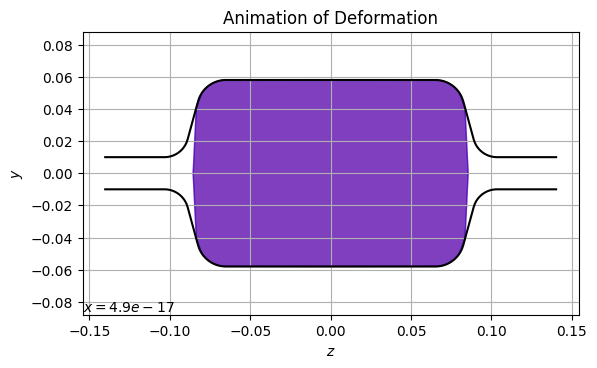

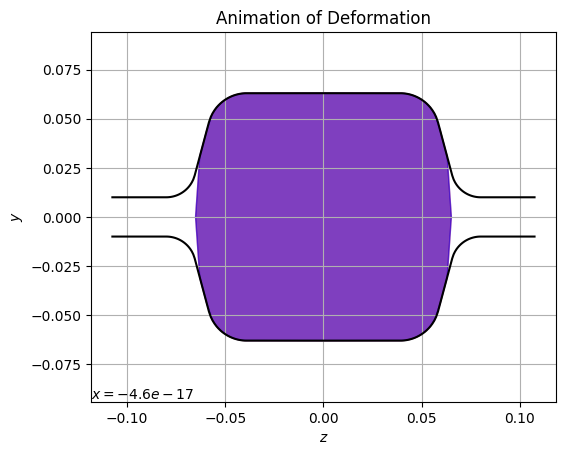

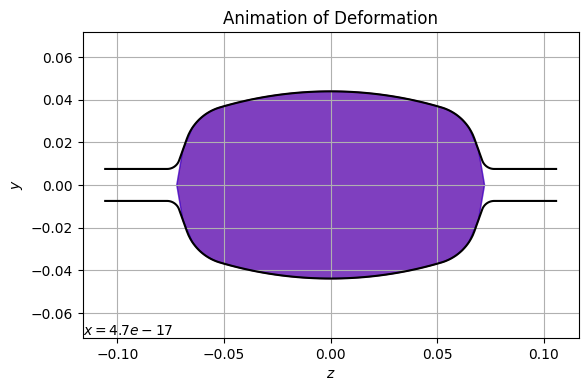

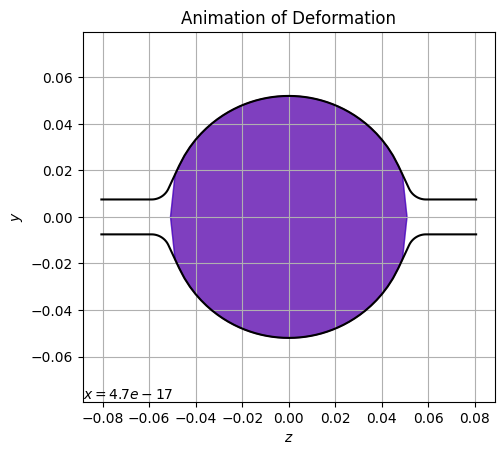

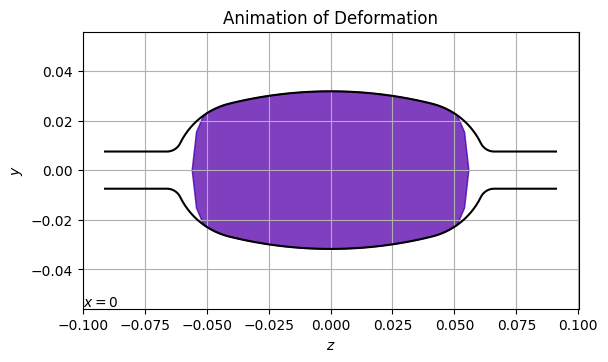

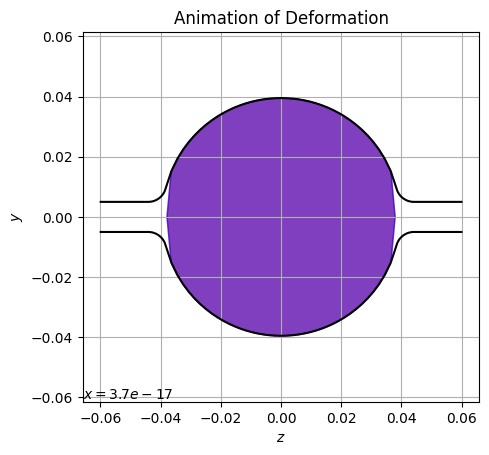

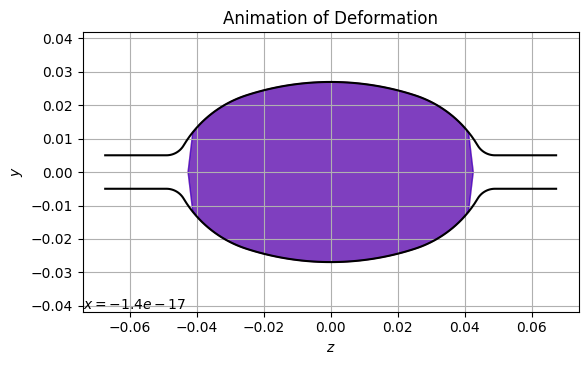

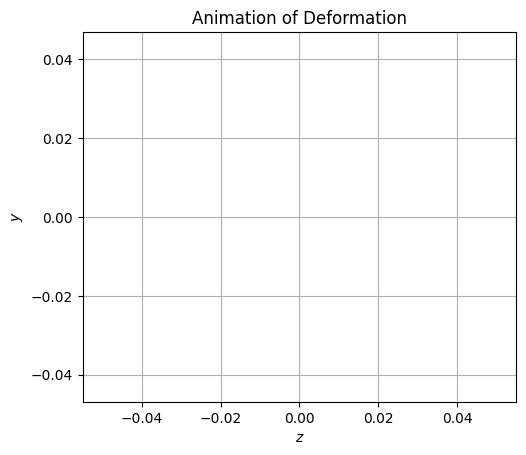

In [25]:
from pathlib import Path
from pyroll.report import report

roughing_train_report = report(r_sequence)
f = Path("report_roughing_train.html")
f.write_text(roughing_train_report, encoding="utf-8")